#Training OpenAI GTP-2
Copyright 2021, Denis Rothman MIT License. Denis Rothman created the Colab notebook using the OpenAI repository, adding title steps for educational purposes only.

**March 2023 message by Denis Rothman:" 
Google Colab does not support Tensorflow 1.x anymore which makes this notebook unstable.
This notebook is replaced by [Summarizing_with_ChatGPT](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Chapter09/Summarizing_with_ChatGPT.ipynb). Click on the link and jump into ChatGPT's potential.

For more on how to begin with ChatGPT, run [jump-start ChatGPT](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Bonus/Jump_Starting_ChatGPT_with_the_OpenAI_API.ipynb)


___________________________________________________________

***Code References***

[Reference: OpenAI Repository](https://github.com/openai/gpt-2)
The repository was cloned and adapted to N Shepperd's repository.

[Reference: N Shepperd Repository](https://github.com/nshepperd/gpt-2)
The repository was not cloned. N Shepperd's training programs were inserted into the OpenAI Repository. The list of N Shepperd's programs are cited in the 'N Shepperd' section of the notebook. Some programs were modified for educational purposes only to work with this notebook.

***Model Reference Paper***

[Alec Radford, Jeffrey Wu, Rewon Child, David Luan, Dario Amodei, Ilya Sutskever,2019,'Language Models are Unsupervised Multitask Learners'](https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf)


***Step 1: Pre-requisites:***

a) activate GPU in the notebook settings runTime menu <br>
b) Upload the following program files and mdset.txt(dataset) with the file manager: train.py,load_dataset.py,encode.py,accumulate,memory_saving_gradients.py,mdset.txt

In [1]:
from IPython.display import Image     #This is used for rendering images in the notebook

#Steps 2 to 6: Initial steps of the training process

In [2]:
#@title Step 2: Cloning the OpenAI GPT-2 Repository 
#!git clone https://github.com/nshepperd/gpt-2.git
!git clone https://github.com/openai/gpt-2.git

Cloning into 'gpt-2'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 236 (delta 0), reused 0 (delta 0), pack-reused 233
Receiving objects: 100% (236/236), 4.38 MiB | 15.00 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [3]:
#@title Step 3: Installing the requirements
import os                     # when the VM restarts import os necessary
os.chdir("/content/gpt-2")    
!pip3 install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.6/601.6 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 6.1 MB/s eta 0:00:00
  Created wheel for regex: filename=regex-2017.4.5-cp310-cp310-linux_x86_64.whl size=677793 sha256=5e74107a5e158ca812c4289d2e091fed7415e58e0f118f2eb4c8a817a32acf09
  Stored in directory: /root/.cache/pip/wheels/51/08/ba/204d631aa07ad5b7ff391f1a4f3e80f56e03

In [4]:
!pip install toposort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#@title Step 4: Checking TensorFlow version 
#Colab has tf 1.x and tf 2.x installed
#Restart runtime using 'Runtime' -> 'Restart runtime...'
%tensorflow_version 1.x # I commented this line bec it does not work
import tensorflow as tf
print(tf.__version__)

ValueError: ignored

In [6]:
#@title Step 5: Downloading 117M parameter GPT-2 Model
# run code and send argument
import os # after runtime is restarted
os.chdir("/content/gpt-2")
!python3 download_model.py '117M' #creates model directory

Fetching checkpoint: 1.00kit [00:00, 775kit/s]                                                      
Fetching encoder.json: 1.04Mit [00:00, 1.05Mit/s]                                                   
Fetching hparams.json: 1.00kit [00:00, 880kit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:38, 13.0Mit/s]                                  
Fetching model.ckpt.index: 6.00kit [00:00, 3.78Mit/s]                                               
Fetching model.ckpt.meta: 472kit [00:00, 651kit/s]                                                  
Fetching vocab.bpe: 457kit [00:00, 528kit/s]                                                        


In [7]:
# Me: 
os.chdir("/content")
!curl -L https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-2nd-Edition/master/Chapter09/gpt-2-train_files/mdset.txt --output "mdset.txt"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91184  100 91184    0     0   382k      0 --:--:-- --:--:-- --:--:--  382k


In [8]:
#@title Step 6: Copying the Project Resources to scr
!cp /content/mdset.txt /content/gpt-2/src/
!cp -r /content/gpt-2/models/ /content/gpt-2/src/

#Step 7: The N Shepperd training files

In [9]:
# Me: 
os.mkdir("/content/nshepperd")
os.chdir("/content/nshepperd")
!curl -L https://raw.githubusercontent.com/nshepperd/gpt-2/finetuning/train.py --output "train.py"
!curl -L https://raw.githubusercontent.com/nshepperd/gpt-2/finetuning/src/load_dataset.py --output "load_dataset.py"
!curl -L https://raw.githubusercontent.com/nshepperd/gpt-2/finetuning/encode.py --output "encode.py"
!curl -L https://raw.githubusercontent.com/nshepperd/gpt-2/finetuning/src/accumulate.py --output "accumulate.py"
!curl -L https://raw.githubusercontent.com/nshepperd/gpt-2/finetuning/src/memory_saving_gradients.py --output "memory_saving_gradients.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14676  100 14676    0     0   398k      0 --:--:-- --:--:-- --:--:--  398k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2647  100  2647    0     0  67871      0 --:--:-- --:--:-- --:--:-- 69657
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1471  100  1471    0     0  37717      0 --:--:-- --:--:-- --:--:-- 37717
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1474  100  1474    0     0  52642      0 --:--:-- --:--:-- --:--:-- 52642
  % Total    % Received % Xferd  Average Speed   Tim

In [10]:
#@title Step 7: Copying the N Shepperd Training Files
#Referfence GitHub repository: https://github.com/nshepperd/gpt-2
import os # import after runtime is restarted
!cp /content/nshepperd/train.py /content/gpt-2/src/
!cp /content/nshepperd/load_dataset.py /content/gpt-2/src/
!cp /content/nshepperd/encode.py /content/gpt-2/src/
!cp /content/nshepperd/accumulate.py /content/gpt-2/src/
!cp /content/nshepperd/memory_saving_gradients.py /content/gpt-2/src/

#Step 8: Encoding the dataset

In [11]:
#@title Step 8:Encoding dataset
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src/")
model_name="117M"
!python /content/gpt-2/src/encode.py mdset.txt out.npz 

2023-06-11 08:33:37.955683: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Reading files
100% 1/1 [00:00<00:00,  6.62it/s]
Writing out.npz


#Step 9: Training a GPT-2 model

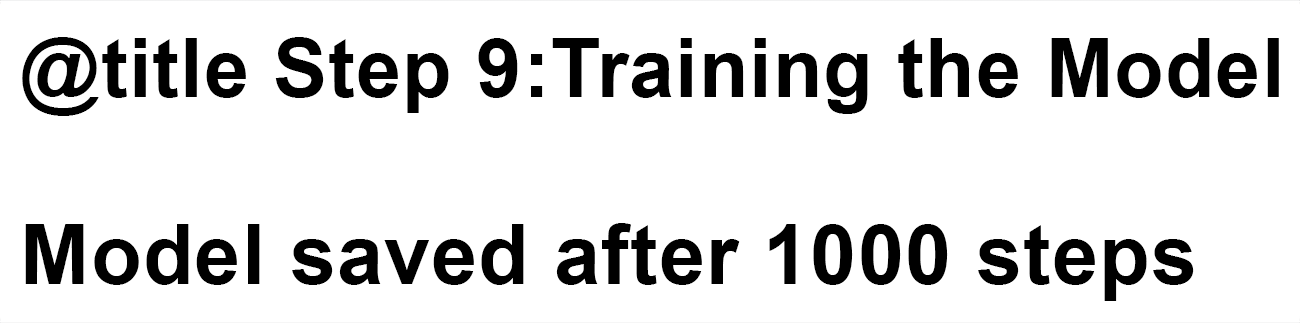

In [ ]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/AppIV/B17948_Appendix%20IV_01.PNG', width=400) #This is used for rendering images in the notebook

In [13]:
#@title Step 9:Training the Model
#Model saved after 1000 steps
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src/")
!python train.py --dataset out.npz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==1.15
2023-06-11 08:42:05.156307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/gpt-2/src/train.py", line 28, in <module>
    import model, sample, encoder
  File "/content/gpt-2/src/model.py", line 3, in <module>
    from tensorflow.contrib.training import HParams
ModuleNotFoundError: No module named 'tensorflow.contrib'


#Step 10: Creating a training model directory

In [ ]:
#@title Step 10: Creating a Training Model directory
#Creating a Training Model directory named 'tgmodel'
import os
run_dir = '/content/gpt-2/models/tgmodel'
if not os.path.exists(run_dir):
  os.makedirs(run_dir)

In [ ]:
#@title Step 10A: Copying training Files
!cp /content/gpt-2/src/checkpoint/run1/model-1000.data-00000-of-00001 /content/gpt-2/models/tgmodel
!cp /content/gpt-2/src/checkpoint/run1/checkpoint /content/gpt-2/models/tgmodel
!cp /content/gpt-2/src/checkpoint/run1/model-1000.index /content/gpt-2/models/tgmodel
!cp /content/gpt-2/src/checkpoint/run1/model-1000.meta /content/gpt-2/models/tgmodel

In [ ]:
#@title Step 10B: Copying the OpenAI GPT-2 117M Model files
!cp /content/gpt-2/models/117M/encoder.json /content/gpt-2/models/tgmodel
!cp /content/gpt-2/models/117M/hparams.json /content/gpt-2/models/tgmodel
!cp /content/gpt-2/models/117M/vocab.bpe /content/gpt-2/models/tgmodel

In [ ]:
#@title Step 10C: Renaming the model directories
import os
!mv /content/gpt-2/models/117M  /content/gpt-2/models/117M_OpenAI
!mv /content/gpt-2/models/tgmodel  /content/gpt-2/models/117M

#Step 11: Generating unconditional samples

In [ ]:
#@title Step 11: Generating Unconditional Samples
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src")
!python generate_unconditional_samples.py --model_name '117M'


2021-06-18 08:18:43.883508: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-06-18 08:18:43.915370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-18 08:18:43.915943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-06-18 08:18:43.916246: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-06-18 08:18:43.917680: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-06-18 08:18:43.919193: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021

#Step 12: Interactive context and completion examples

In [ ]:
#@title Step 12: Interactive Context and Completion Examples
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src")
!python interactive_conditional_samples.py --temperature 0.8 --top_k 40 --model_name '117M' --length 50


2021-06-18 08:19:21.830534: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-06-18 08:19:21.859241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-18 08:19:21.859819: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-06-18 08:19:21.860123: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-06-18 08:19:21.861514: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-06-18 08:19:21.862937: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021

#Controlling Tokenized Data

In [ ]:
#@title Additional Tools: Controlling Tokenized Data
#Unzip out.npz
import zipfile
with zipfile.ZipFile('/content/gpt-2/src/out.npz', 'r') as zip_ref:
    zip_ref.extractall('/content/gpt-2/src/')

#Load arr_0.npy which contains encoded dset
import numpy as np
f=np.load('/content/gpt-2/src/arr_0.npy')
print(f)
print(f.shape)
for i in range(0,10):
    print(f[i])
     
#We first import encoder.json
import json
i=0
with open("/content/gpt-2/models/117M/encoder.json", "r") as read_file:
    print("Converting the JSON encoded data into a Python dictionary")
    developer = json.load(read_file) #converts the encoded data into a Python dictionary
    for key, value in developer.items(): #we parse the decoded json data
        i+=1
        if(i>10):
            break;
        print(key, ":", value)

#We will now search for the key and value for each encoded token
    for i in range(0,500):
        for key, value in developer.items():
            if f[i]==value:
                print(key, ":", value)

[1212 5644  326 ...   13  198 2682]
(29379,)
1212
5644
326
11
355
716
78
1765
1868
4778
Converting the JSON encoded data into a Python dictionary
! : 0
" : 1
# : 2
$ : 3
% : 4
& : 5
' : 6
( : 7
) : 8
* : 9
This : 1212
Ġsuggests : 5644
Ġthat : 326
, : 11
Ġas : 355
Ġam : 716
o : 78
eb : 1765
oid : 1868
Ġcells : 4778
Ġare : 389
Ġless : 1342
Ġcontract : 2775
ile : 576
, : 11
Ġwhile : 981
Ġmes : 18842
ench : 24421
ym : 4948
al : 282
Ċ : 198
cells : 46342
Ġare : 389
Ġmore : 517
Ġcontract : 2775
ile : 576
, : 11
Ġand : 290
Ġthere : 612
Ġmay : 743
Ġbe : 307
Ġa : 257
Ġswitching : 15430
Ġbetween : 1022
Ġam : 716
o : 78
eb : 1765
oid : 1868
Ġand : 290
Ġmes : 18842
ench : 24421
ym : 4948
al : 282
Ċ : 198
m : 76
igration : 4254
, : 11
Ġperhaps : 3737
Ġthere : 612
Ġcan : 460
Ġalso : 635
Ġbe : 307
Ġa : 257
Ġswitching : 15430
Ġbetween : 1022
Ġthe : 262
Ġdominance : 18648
Ġof : 286
Ġchem : 4607
ot : 313
axis : 22704
Ġ( : 357
amo : 18811
eb : 1765
oid : 1868
Ċ : 198
m : 76
igration : 4254
) : 8
Ġand : 2